In [5]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Annotated
from langchain_core.messages import BaseMessage, HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI  # Change this import

# Create the llm instance using Google Gemini
llm = ChatGoogleGenerativeAI(model="gemini-1.5-flash", temperature=0.3)

In [6]:
from langgraph.graph.message import add_messages

class ChatState(TypedDict):

    messages: Annotated[list[BaseMessage], add_messages]

In [7]:
def chat_node(state: ChatState):

    # take user query from state
    messages = state['messages']

    # send to llm
    response = llm.invoke(messages)

    # response store state
    return {'messages': [response]}

In [8]:
graph = StateGraph(ChatState)

# add nodes
graph.add_node('chat_node', chat_node)

graph.add_edge(START, 'chat_node')
graph.add_edge('chat_node', END)

chatbot = graph.compile()

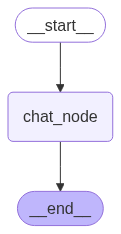

In [9]:
chatbot

In [15]:
initial_state = {
    'messages': [HumanMessage(content='Who is langchain')]
}

chatbot.invoke(initial_state)['messages'][-1].content

"LangChain is not a person; it's an open-source framework for developing applications powered by large language models (LLMs).  It provides tools and components to help developers build applications that interact with LLMs in a more sophisticated and effective way than simply sending prompts and receiving responses.  Think of it as a toolbox for building LLM-powered applications.  It handles things like:\n\n* **Chain building:** Combining multiple LLMs and other components (like databases or APIs) into a single workflow.\n* **Memory:** Allowing applications to remember past interactions with the user, improving context and conversation flow.\n* **Agents:** Enabling LLMs to interact with their environment (e.g., searching the web, accessing databases) to answer questions or complete tasks.\n* **Indexes:**  Organizing and querying data to provide relevant context to LLMs.\n\n\nEssentially, LangChain simplifies the process of creating complex and powerful applications that leverage the ca

In [16]:
# define state
class BMIState(TypedDict):

    weight_kg: float
    height_m: float
    bmi: float
    category: str

In [17]:
def calculate_bmi(state: BMIState) -> BMIState:

    weight = state['weight_kg']
    height = state['height_m']

    bmi = weight/(height**2)

    state['bmi'] = round(bmi, 2)

    return state

In [18]:
def label_bmi(state: BMIState) -> BMIState:

    bmi = state['bmi']

    if bmi < 18.5:
        state["category"] = "Underweight"
    elif 18.5 <= bmi < 25:
        state["category"] = "Normal"
    elif 25 <= bmi < 30:
        state["category"] = "Overweight"
    else:
        state["category"] = "Obese"

    return state

In [19]:
# define your graph
graph = StateGraph(BMIState)

# add nodes to your graph
graph.add_node('calculate_bmi', calculate_bmi)
graph.add_node('label_bmi', label_bmi)

# add edges to your graph
graph.add_edge(START, 'calculate_bmi')
graph.add_edge('calculate_bmi', 'label_bmi')
graph.add_edge('label_bmi', END)


# compile the graph
workflow = graph.compile()

In [20]:
# execute the graph
intial_state = {'weight_kg':80, 'height_m':1.73}

final_state = workflow.invoke(intial_state)

print(final_state)

{'weight_kg': 80, 'height_m': 1.73, 'bmi': 26.73, 'category': 'Overweight'}


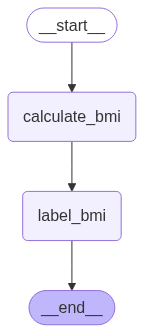

In [22]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())